In [203]:
# Cloning repository
#!git clone https://github.com/Tharindu209-playground/intellihack_team_vertex_task_1.git

#%cd intellihack_team_vertex_task_1/

In [204]:
# !git checkout phase1
# !git status
# !git pull origin phase1

## 1. Data Exploraton:
Trying to visualise and understand the dataset.


In [205]:
#initial dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Connecting the dataset file(df) and checking the connectivity.

In [206]:
df = pd.read_csv('/content/data/Crop_Dataset.csv')
df.head(5)

,N,P,K,temperature,humidity,ph,rainfall,Total_Nutrients,Temperature_Humidity,Log_Rainfall,Label,Label_Encoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,175,1712.196283,5.317804,wheat,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,184,1748.595734,5.427834,wheat,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,159,1893.744627,5.579595,wheat,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,149,2123.482908,5.496611,wheat,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,162,1642.720357,5.574878,wheat,0


Basic insight about the data set.

In [207]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   N                     2200 non-null   int64  
 1   P                     2200 non-null   int64  
 2   K                     2200 non-null   int64  
 3   temperature           2200 non-null   float64
 4   humidity              2200 non-null   float64
 5   ph                    2200 non-null   float64
 6   rainfall              2200 non-null   float64
 7   Total_Nutrients       2200 non-null   int64  
 8   Temperature_Humidity  2200 non-null   float64
 9   Log_Rainfall          2200 non-null   float64
 10  Label                 2200 non-null   object 
 11  Label_Encoded         2200 non-null   int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 206.4+ KB


,N,P,K,temperature,humidity,ph,rainfall,Total_Nutrients,Temperature_Humidity,Log_Rainfall,Label_Encoded
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,152.063636,1854.231566,4.508730,10.500000
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,79.918669,699.366334,0.545400,6.345731
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,17.000000,247.613182,3.054533,0.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,94.000000,1479.558114,4.182839,5.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,146.000000,1927.883340,4.562968,10.500000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,179.000000,2255.752423,4.830451,16.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,385.000000,4073.159566,5.702315,21.000000


**Conclusion**: No null values in the set. 'Lable' and 'Lable_Encoded' are output variables and should'nt be added as features.

---

In [208]:
#checking the distribution of Lable class
df['Label'].value_counts()

Label
wheat               100
barley              100
rapeseed            100
potatoes            100
apples              100
strawberries        100
blackcurrants       100
pears               100
raspberries         100
plums               100
cherries            100
beets               100
carrots             100
turnips             100
peas                100
beans               100
cabbage             100
brussels_sprouts    100
cauliflower         100
spinach             100
lettuce             100
tomatoes            100
Name: count, dtype: int64

In [209]:
min_values = df.min()
max_values = df.max()
print("Minimum Values in Each Column:")
print(min_values)
print("\nMaximum Values in Each Column:")
print(max_values)

Minimum Values in Each Column:
N                                0
P                                5
K                                5
temperature               8.825675
humidity                  14.25804
ph                        3.504752
rainfall                 20.211267
Total_Nutrients                 17
Temperature_Humidity    247.613182
Log_Rainfall              3.054533
Label                       apples
Label_Encoded                    0
dtype: object

Maximum Values in Each Column:
N                               140
P                               145
K                               205
temperature               43.675493
humidity                  99.981876
ph                         9.935091
rainfall                 298.560117
Total_Nutrients                 385
Temperature_Humidity    4073.159566
Log_Rainfall               5.702315
Label                         wheat
Label_Encoded                    21
dtype: object


**Conclusion**: Since value ranges are two heigh need to rescale.

---



Representation of the relationships among features (excluding Lable data column)

In [210]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

numeric_df_label = numeric_df.copy()
numeric_df_label['Label'] = df['Label']

1. Pairplot to visualize the relationships between features, colored by 'Label'



In [211]:
#sns.pairplot(numeric_df_label, hue='Label')

2. Creating a correlation matrix heatmap.

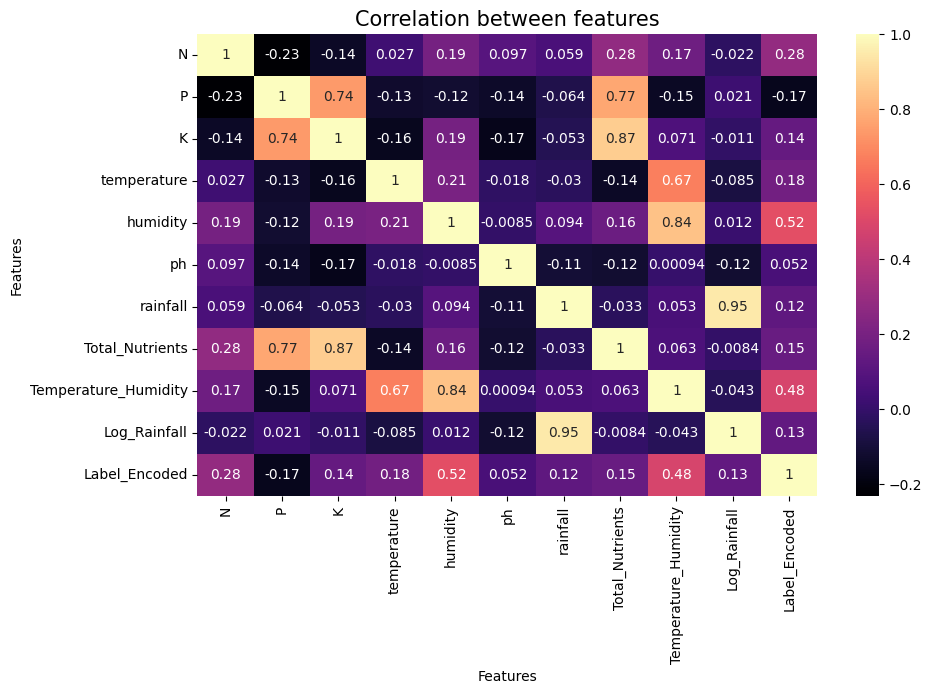

In [212]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='magma', ax=ax)
ax.set_xlabel('Features')  # xlabel set correctly
ax.set_ylabel('Features')  # ylabel set correctly

plt.title('Correlation between features', fontsize=15, color='black')
plt.show()

**Conclusion:**



*   core features [N, P, K, temperature, humidity, ph, rainfall]
*   derived features [Total_Nutrients, Temperature_Humidity, Log_Rainfall]
*   output lables [Lables, Lable_Encoded]





**Note:**


*   Rainfall and Log_rainfall shows heigh corelation. Should add only one.
*   Others are dismissble(need to test out more for potential relations)


---

# 2. Preprocessing

In [213]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

Define the features and the Output target.

In [214]:
X = df.drop(['Label', 'Label_Encoded', 'Label_Encoded'], axis=1)  # drop output features, including unwanted features
y = df['Label']  # Target variable

Splitting the data (70% train - 30% test)

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


Choose only numeric data to scale.

In [216]:
# Only numeric columns (excluding 'Label')
numeric_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'Total_Nutrients', 'Temperature_Humidity']


Scaler initialization (MinMax)

In [217]:
scaler = MinMaxScaler()

# Apply Min-Max scaling only on numeric columns of training data
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
# Apply the same scaling to the numeric columns of testing data
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


Re add Lable and save test and train sets separately.

In [218]:
# Prepare the final training data
train_data = X_train.copy()
train_data['Label'] = y_train  # Adding the labels back to the training data
train_data.to_csv('/content/data/Train_Dataset.csv', index=False)

# Prepare the final testing data
test_data = X_test.copy()
test_data['Label'] = y_test  # Adding the labels back to the testing data
test_data.to_csv('/content/data/Test_Dataset.csv', index=False)

print(train_data.head())

             N         P      K  temperature  humidity        ph  rainfall  \
264   0.371429  0.485714  0.370     0.244574  0.052394  0.674885  0.264863   
190   0.564286  0.385714  0.060     0.335137  0.577208  0.488450  0.317022   
1204  0.171429  0.900000  0.955     0.383082  0.810576  0.346340  0.161790   
1291  0.100000  0.828571  0.990     0.026070  0.810622  0.412775  0.194590   
1486  0.607143  0.114286  0.210     0.610494  0.890666  0.417152  0.015599   

      Total_Nutrients  Temperature_Humidity  Log_Rainfall        Label  
264          0.509537              0.019330      4.553907      lettuce  
190          0.376022              0.275700      4.695974       barley  
1204         0.910082              0.419240      4.194859     cherries  
1291         0.874659              0.148335      4.323657     cherries  
1486         0.370572              0.645715      3.246382  raspberries  


**note**: didn't add Lable_Encoded back. droped Log_rainfall.

---

# 3. Model Training

Train using Random Forest, Support Vector Classifier

In [219]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#from xgboost import XGBClassifier
import joblib

In [220]:
#training data
train_data = pd.read_csv('/content/data/Train_Dataset.csv')
X_train = train_data.drop('Label', axis=1)
y_train = train_data['Label']

Train

In [221]:
# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Support Vector Classifier
svc_clf = SVC(kernel='linear', random_state=42)

# # Extreme Gradient Boosting
# xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

In [222]:
# Training Random Forest
rf_clf.fit(X_train, y_train)
joblib.dump(rf_clf, '/content/models/random_forest_model.joblib')

# Training SVC
svc_clf.fit(X_train, y_train)
joblib.dump(svc_clf, '/content/models/svc_model.joblib')

# # Training XGBoost
# xgb_clf.fit(X_train, y_train)
# joblib.dump(xgb_clf, '/content/models/xgb_model.joblib')

['/content/models/svc_model.joblib']

# 4. Evaluation

Testing the accuracies.

In [223]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

In [224]:
# Load testing data
test_data = pd.read_csv('/content/data/Test_Dataset.csv')
X_test = test_data.drop('Label', axis=1)
y_test = test_data['Label']

Plot the result.

In [225]:

def evaluate_and_plot(model, X_train, y_train, X_test, y_test, model_name):
    # Predict on testing set
    y_pred = model.predict(X_test)

    # Accuracy and classification report
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"Accuracy of {model_name}: {accuracy}")
    print(f"Classification Report of {model_name}:\n{report}")

    # Cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"Cross-Validation Accuracy Scores for {model_name}: {scores.mean()} +/- {scores.std()}\n")

    # Plotting
    return accuracy, scores.mean()

In [226]:
# Perform evaluations
results = {}
results['Random Forest'] = evaluate_and_plot(rf_clf, X_train, y_train, X_test, y_test, "Random Forest")
results['SVC'] = evaluate_and_plot(svc_clf, X_train, y_train, X_test, y_test, "SVC")

Accuracy of Random Forest: 0.9939393939393939
Classification Report of Random Forest:
                  precision    recall  f1-score   support

          apples       1.00      1.00      1.00        30
          barley       0.97      1.00      0.98        30
           beans       1.00      0.93      0.97        30
           beets       1.00      1.00      1.00        30
   blackcurrants       1.00      1.00      1.00        30
brussels_sprouts       0.97      1.00      0.98        30
         cabbage       1.00      1.00      1.00        30
         carrots       1.00      1.00      1.00        30
     cauliflower       1.00      1.00      1.00        30
        cherries       1.00      1.00      1.00        30
         lettuce       1.00      1.00      1.00        30
           pears       1.00      1.00      1.00        30
            peas       1.00      1.00      1.00        30
           plums       1.00      1.00      1.00        30
        potatoes       1.00      1.00      

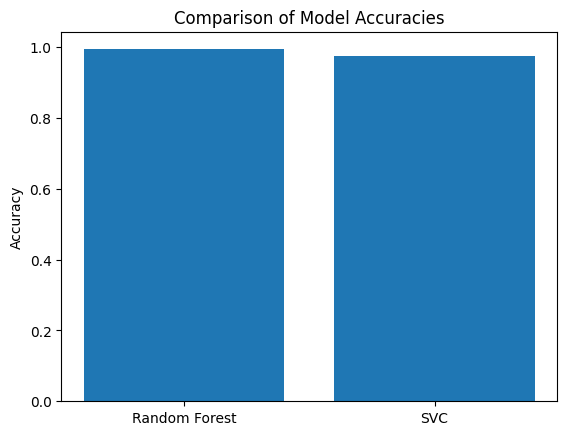

In [227]:
# Plotting accuracies
names = list(results.keys())
values = [result[0] for result in results.values()]
plt.bar(names, values)
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy')
plt.show()

In [228]:
# # Configuring Git coder's name
# !git config --global user.name "Sahan Heshan"
# !git config --global user.email "dshsamarathunga@gmail.com"

# # Stage changes
# !git add ./DataAnalysis.ipynb

# # Commit changes
# !git commit -m "Update 0x"

# # Push changes
# !git push origin phase1